In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<p style="text-indent:2em">学习了基本的pytorch操作之后，开始学习使用pytorch来进行模型的训练和保存，从最基础的Linear regression到后面的模型，我会一步步学习，然后把自己学习的经历放上来。</p>
首先，整一个流程。

- 读取和处理数据，本例使用numpy生成数据进行一个模拟的数据集
- 创建模型，包括Loss函数，优化算法，等
+ 训练
+ 结果可视化和模型保存

Epoch 0/2000, loss: 0.9653
Epoch 200/2000, loss: 0.2601
Epoch 400/2000, loss: 0.1740
Epoch 600/2000, loss: 0.1690
Epoch 800/2000, loss: 0.1690
Epoch 1000/2000, loss: 0.1689
Epoch 1200/2000, loss: 0.1689
Epoch 1400/2000, loss: 0.1689
Epoch 1600/2000, loss: 0.1689
Epoch 1800/2000, loss: 0.1689


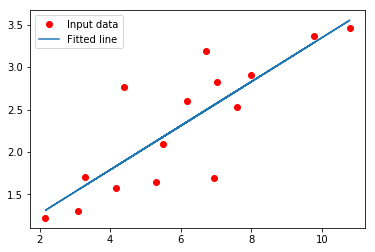

In [2]:
#toy dataset
# x = np.linspace(0,10,20,dtype=np.double)
# y = np.linspace(4,20,20,dtype=np.double)

x = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
#define model
model = torch.nn.Linear(1,1)

#define loss and optim
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001,momentum=0.99)
criterion = torch.nn.MSELoss()

#train the model
for epoch in range(2000):
    #convert numpy to tensor
    inputs = torch.from_numpy(x)
    outputs = torch.from_numpy(y)
    
    #forward
    pred = model(inputs)
    loss = criterion(pred, outputs)
    
    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%200 == 0:
        print('Epoch {}/{}, loss: {:.4f}'.format(epoch, 2000, loss.item()))
    
#plt the graph
predicted = model(torch.from_numpy(x)).detach().numpy()
plt.plot(x, y, 'ro', label='Input data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [3]:
#save model
torch.save(model.state_dict(), 'linear_model.ckpt')